# 2021/12/30
# 本代码绘制925、850，700，500的层次
# 适用于论文v1.2的图2 appendix
# 内容有流场、辐合辐散、上升下沉

In [10]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

In [11]:
level  =  [925,850,700,500]
path  =  "/home/sun/qomo-data/"

f1 =  xr.open_dataset(path+"composite3.nc").sel(level=level)
# 求取四月平均
avg_u  =  np.average(f1.uwind[0:30,:],axis=0)
avg_v  =  np.average(f1.vwind[0:30,:],axis=0)
avg_w  =  np.average(f1.OMEGA[0:30,:],axis=0)*-60

# 求取散度
disy,disx,location = cal_xydistance(f1.lat,f1.lon)
vy =  np.gradient(avg_v,location,axis=1)
ux =  vy.copy()
for i in range(len(f1.lat)):
    ux[:,i,:] = np.gradient(avg_u[:,i,:],disx[i],axis=1)
    
div  =  (vy+ux)*1E6 #注意这里放缩了

/home/sun/miniconda3/envs/swh/lib/python3.9/site-packages/numpy/lib/function_base.py:1080: RuntimeWarning: divide by zero encountered in true_divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/home/sun/miniconda3/envs/swh/lib/python3.9/site-packages/numpy/lib/function_base.py:1101: RuntimeWarning: divide by zero encountered in true_divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/home/sun/miniconda3/envs/swh/lib/python3.9/site-packages/numpy/lib/function_base.py:1108: RuntimeWarning: divide by zero encountered in true_divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


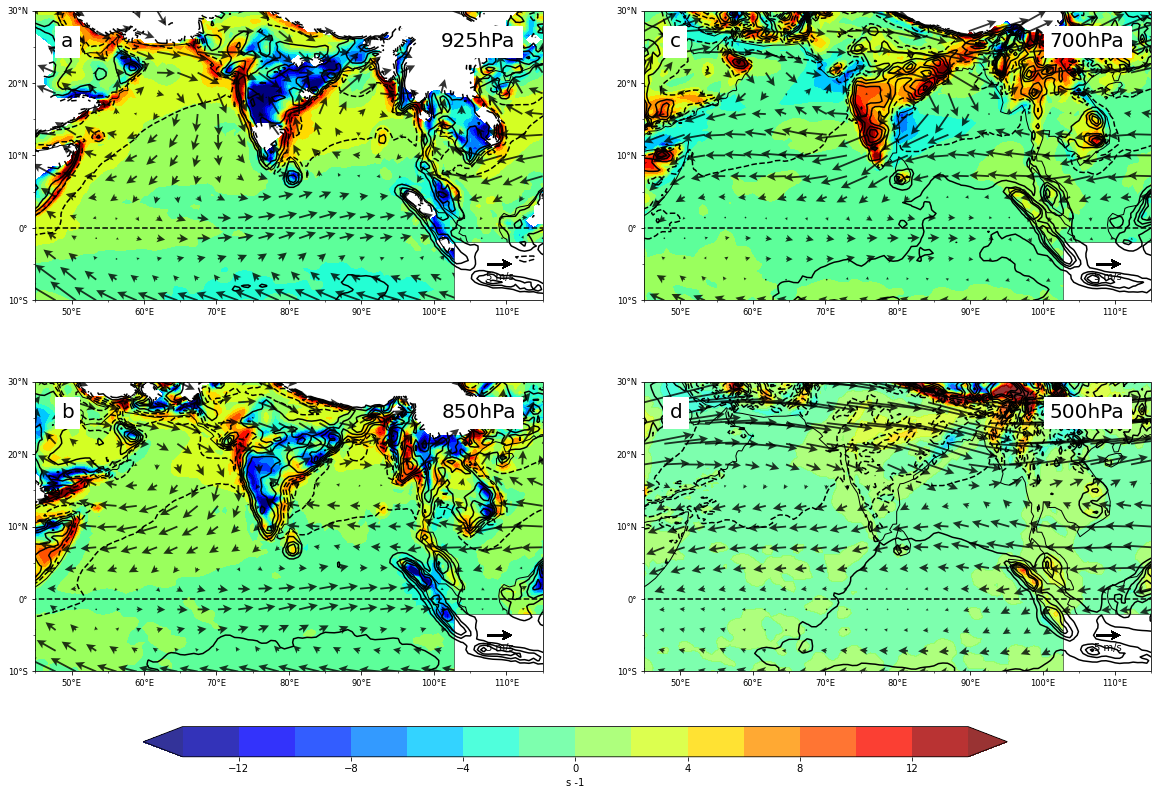

In [38]:
lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,14))
spec1   =  fig1.add_gridspec(nrows=2,ncols=2)
    

ax = fig1.add_subplot(spec1[0,0],projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

ax.plot([40,120],[0,0],'k--')
im1  =  ax.contourf(f1.lon,f1.lat,div[0,:],levels=np.linspace(-14,14,15),cmap='jet',alpha=1,extend='both')
im2  =  ax.contour(f1.lon,f1.lat,avg_w[0,:],levels=np.linspace(-10,10,8),colors='k',alpha=1)
q  =  ax.quiver(f1.lon, f1.lat, avg_u[0,:], avg_v[0,:], 
                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                scale_units='xy', scale=1.5,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                units='xy', width=0.25,
                transform=proj,alpha=0.8,
                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)

ax.text(0.05,0.875,"a",transform=ax.transAxes,bbox=props,fontsize=20)
ax.text(0.80,0.875,"925hPa",transform=ax.transAxes,bbox=props,fontsize=20)

rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                            fc='white', ec='k', lw=0.5, zorder=1.1
                            )
ax.add_patch(rect)

qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                    label=f'{5} m/s', labelpos='S', labelsep=0.1,)


ax = fig1.add_subplot(spec1[1,0],projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

ax.plot([40,120],[0,0],'k--')
im1  =  ax.contourf(f1.lon,f1.lat,div[1,:],levels=np.linspace(-14,14,15),cmap='jet',alpha=1,extend='both')
im2  =  ax.contour(f1.lon,f1.lat,avg_w[1,:],levels=np.linspace(-10,10,8),colors='k',alpha=1)
q  =  ax.quiver(f1.lon, f1.lat, avg_u[1,:], avg_v[1,:], 
                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                scale_units='xy', scale=1.5,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                units='xy', width=0.25,
                transform=proj,alpha=0.8,
                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)

ax.text(0.05,0.875,"b",transform=ax.transAxes,bbox=props,fontsize=20)
ax.text(0.80,0.875,"850hPa",transform=ax.transAxes,bbox=props,fontsize=20)

rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                            fc='white', ec='k', lw=0.5, zorder=1.1
                            )
ax.add_patch(rect)

qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                    label=f'{5} m/s', labelpos='S', labelsep=0.1,)

ax = fig1.add_subplot(spec1[0,1],projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

ax.plot([40,120],[0,0],'k--')
im1  =  ax.contourf(f1.lon,f1.lat,div[2,:],levels=np.linspace(-14,14,15),cmap='jet',alpha=1,extend='both')
im2  =  ax.contour(f1.lon,f1.lat,avg_w[2,:],levels=np.linspace(-10,10,8),colors='k',alpha=1)
q  =  ax.quiver(f1.lon, f1.lat, avg_u[2,:], avg_v[2,:], 
                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                scale_units='xy', scale=1.5,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                units='xy', width=0.25,
                transform=proj,alpha=0.8,
                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)

ax.text(0.05,0.875,"c",transform=ax.transAxes,bbox=props,fontsize=20)
ax.text(0.80,0.875,"700hPa",transform=ax.transAxes,bbox=props,fontsize=20)

rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                            fc='white', ec='k', lw=0.5, zorder=1.1
                            )
ax.add_patch(rect)

qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                    label=f'{5} m/s', labelpos='S', labelsep=0.1,)

ax = fig1.add_subplot(spec1[1,1],projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

ax.plot([40,120],[0,0],'k--')
im1  =  ax.contourf(f1.lon,f1.lat,div[3,:],levels=np.linspace(-14,14,15),cmap='jet',alpha=0.8,extend='both')
im2  =  ax.contour(f1.lon,f1.lat,avg_w[3,:],levels=np.linspace(-10,10,8),colors='k',alpha=1,linewidths=1.5)
q  =  ax.quiver(f1.lon, f1.lat, avg_u[3,:], avg_v[3,:], 
                regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                scale_units='xy', scale=1.5,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                units='xy', width=0.25,
                transform=proj,alpha=0.8,
                color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)

ax.text(0.05,0.875,"d",transform=ax.transAxes,bbox=props,fontsize=20)
ax.text(0.80,0.875,"500hPa",transform=ax.transAxes,bbox=props,fontsize=20)

rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                            fc='white', ec='k', lw=0.5, zorder=1.1
                            )
ax.add_patch(rect)

qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                    label=f'{5} m/s', labelpos='S', labelsep=0.1,)



fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im1, cax=cbar_ax, shrink=0.1, pad=0.1, orientation='horizontal',label='s -1')

plt.savefig("/home/sun/paint/lunwen/version1.2/fig2_appendix_v1.2_multilevel_vector_div_omega.pdf", bbox_inches='tight', dpi=350)
plt.show()

In [4]:
div.shape

(4, 361, 576)